## Reading Data

In [2]:
import os
import cv2
from tensorflow.keras.utils import to_categorical

CLASSES = ["flooded", "non-flooded"]
def load_data(data_path):
    data = []
    labels = []
    for c in CLASSES:
        path = os.path.join(data_path, c)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_array = cv2.resize(img_array, (227, 227))
            data.append(img_array)
            labels.append(CLASSES.index(c))

    labels = to_categorical(labels)
    return data, labels


# Load data
data, labels = load_data("./Dataset")

## Splitting Data

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)

X_test = np.array(X_test)
y_test = np.array(y_test)

## Preprocessing

(227, 227, 3)


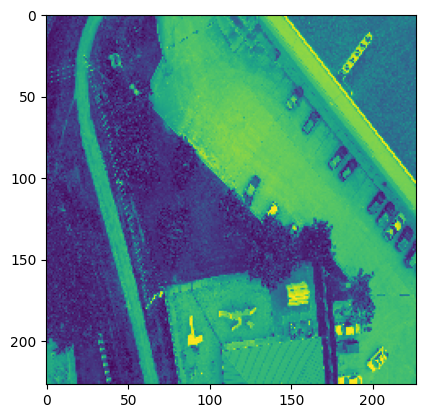

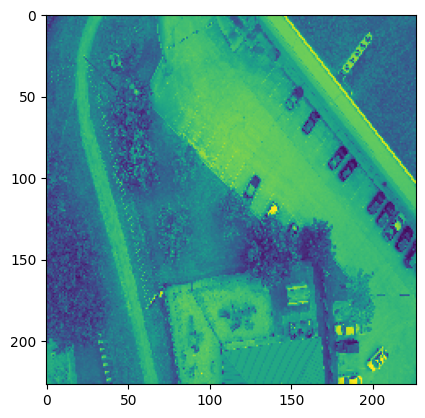

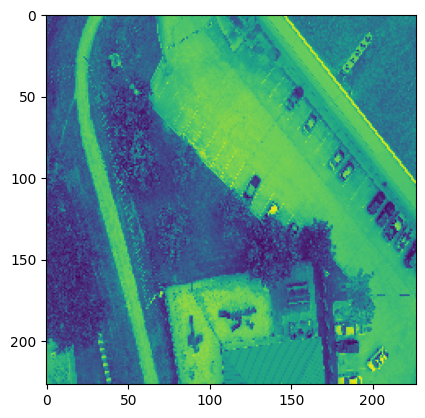

In [14]:
import matplotlib.pyplot as plt

print(X_train[0].shape)
plt.imshow(X_train[5][:,:,0])
plt.show()
plt.imshow(X_train[5][:,:,1])
plt.show()
plt.imshow(X_train[5][:,:,2])
plt.show()

# is the images rgb or bgr?
# save the images as rgb
import cv2

In [19]:
list = [
    [1 , 2 , 3],
    [4 , 5 , 6]
]

list = np.array(list)

print(np.mean(list))

3.5


## Features Extraction

In [11]:
from skimage.feature import greycomatrix, greycoprops , local_binary_pattern

In [16]:
def water_index(img):
    water_idx = (img[:,:,1] - img[:,:,0]) / (img[:,:,1] + img[:,:,0]+0.000000001)
    water_idx = np.array(water_idx)
    avg_water_idx = np.mean(water_idx)
    return avg_water_idx

def GLCM(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    glcm = greycomatrix(img, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = greycoprops(glcm, 'contrast')
    dissimilarity = greycoprops(glcm, 'dissimilarity')
    homogeneity = greycoprops(glcm, 'homogeneity')
    energy = greycoprops(glcm, 'energy')
    correlation = greycoprops(glcm, 'correlation')

    avg_contrast = np.mean(contrast)
    avg_dissimilarity = np.mean(dissimilarity)
    avg_homogeneity = np.mean(homogeneity)
    avg_energy = np.mean(energy)
    avg_correlation = np.mean(correlation)

    return avg_contrast, avg_dissimilarity, avg_homogeneity, avg_energy, avg_correlation


def color_histogram(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    pixels = img.reshape(-1, 3)

    k = 5
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    flags = cv2.KMEANS_RANDOM_CENTERS
    _, labels, centers = cv2.kmeans(pixels.astype(np.float32), k, None, criteria, 10, flags)

    hist, _ = np.histogram(labels, bins=np.arange(k+1))

    hist = hist / float(hist.sum())

    return hist

def extract_lbp(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, 8 , 3)
    hist, _ = np.histogram(lbp.ravel(), bins=np.linspace(0, 255, 257))
    bins = np.array_split(hist, 8)
    features = [np.sum(b) for b in bins]
    return features

def extract_features(images):
    features = []
    for img in images:
        water_idx = water_index(img)
        contrast, dissimilarity, homogeneity, energy, correlation = GLCM(img)
        hist = color_histogram(img)
        lbp = extract_lbp(img)
        features.append([water_idx, contrast, dissimilarity, homogeneity, energy, correlation, hist[0], hist[1], hist[2], hist[3], hist[4] , lbp[0], lbp[1], lbp[2], lbp[3], lbp[4], lbp[5], lbp[6], lbp[7]])
    features = np.array(features)   
    return features

X_train_features = extract_features(X_train)
X_val_features = extract_features(X_val)
X_test_features = extract_features(X_test)

print(X_train_features.shape)
print(X_val_features.shape)
print(X_test_features.shape)


c:\Python39\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
c:\Python39\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
c:\Python39\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
c:\Python39\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
c:\Python39\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Fun

(663, 19)
(185, 19)
(74, 19)


c:\Python39\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
c:\Python39\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
c:\Python39\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
c:\Python39\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
c:\Python39\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Fun

In [17]:
y_train = np.argmax(y_train, axis=1)
y_val = np.argmax(y_val, axis=1)

## Model Training

In [18]:
# use random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#print(y_train.shape)
#y_train = np.argmax(y_train, axis=1)
print(y_train.shape)

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train_features, y_train)


(663,)


RandomForestClassifier(max_depth=2, random_state=0)

In [20]:
import matplotlib.pyplot as plt

## Evaluation

0.8108108108108109


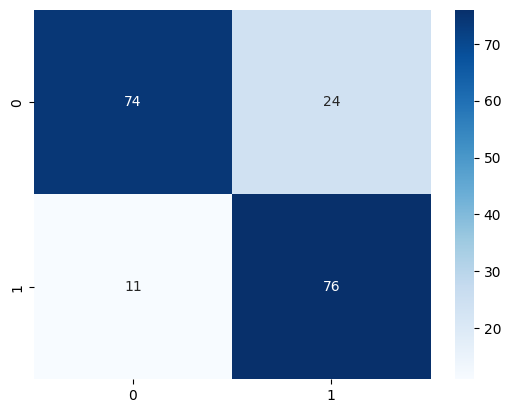

In [21]:
y_pred = clf.predict(X_val_features)

print(accuracy_score(y_val, y_pred))

# y_pred = clf.predict(X_test_features)

# print(accuracy_score(y_test, y_pred))

# plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()






0.5135135135135135


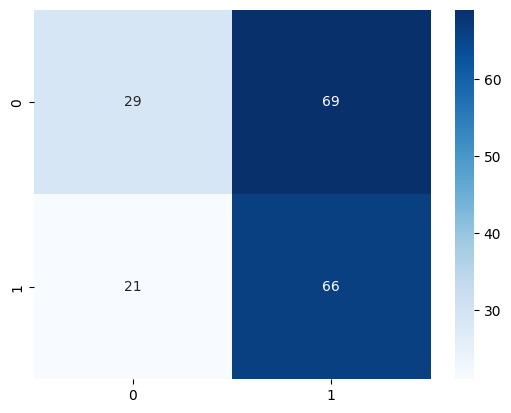

In [32]:
# naive bayes classifier
from sklearn.naive_bayes import MultinomialNB

gnb = MultinomialNB(alpha=0.0007)
gnb.fit(X_train_features, y_train)

y_pred = gnb.predict(X_val_features)

print(accuracy_score(y_val, y_pred))

# y_pred = gnb.predict(X_test_features)

# print(accuracy_score(y_test, y_pred))

# plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()



In [33]:
# use svm classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(X_train_features, y_train)



In [ ]:
y_pred = clf.predict(X_val_features)

print(accuracy_score(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()
